

# Project: Investigate a Dataset (TMDB movie data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> We are analysing the TMDB movie list , it contains information  about 10 thousand movie , we'll dive and try to answer 
some questions like :  
which genres are most popular from year to year ? 
which genres of movies have the highest and lowest budget ?  
which  movies have the highest and lowest revenue ?  
which movies have the highest and lowest budget ?  
which movies have the highest and lowest runtime ?  
how revenues changed over the years ?  
finding the characteristics of high revenue movies.





In [2]:
# import pandas ,numpy and matplotlib 
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [49]:
# Loading data and printing a few lines
df = pd.read_csv('tmdb-movies.csv',index_col='id')
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### inspecting data now 

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count    

In [5]:
#checking for null values
df.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
#checking for duplicate values
df.duplicated().sum()

1

## Observations
>1- There are missing values in various columns  like homepage , directors, tagline, keywords, overview , genres,
production companies, 
most of them won't be useful in our analysis so we will remove their columns , and  drop the columns of the other 
missing values  
2- there are multiple genres types in each record ,so we need to split these types for further analysis  
3- the budget and revenue are displayed in float type , we need to change them to type  int64




### Data Cleaning (removing unnecessary data from the dataset!)

>1- We will remove unused columns in our data set like imdb_id,cast,homepage,tagline,keywords  
2-remove row duplicates  
3- remove the zero values in the budget and revenue cloumns   
4- change release date to time date format  
5-change the format of the budget and revenue columns from float to int  
6- adjust and split the genres columns to facilitate further analysis  


### 1- remove unused columns

In [7]:
# deleting the columns
df.drop(['imdb_id','budget','revenue','cast','homepage','production_companies','tagline','keywords'],axis=1,inplace=True)


#### 2-remove duplicates rows

there is  only one duplicate row 
now removing

In [9]:
df.drop_duplicates(inplace=True)

check that there is no more duplicates

In [10]:
df.duplicated().sum()

0

#### 3 - remove the zero values from budget and revenue columns

In [50]:
#creating a list of columns containg zero values 
zero_list = ['budget_adj','revenue_adj']
#replacing 0 values with NAN
df[zero_list] = df[zero_list].replace(0,np.NAN)
#drop NaN values
df.dropna(subset=zero_list,inplace=True)
#checking for zero values
i = df[df['budget_adj']== 0]
i


,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 135397 to 2161
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3854 non-null   float64
 1   original_title  3854 non-null   object 
 2   director        3853 non-null   object 
 3   overview        3854 non-null   object 
 4   runtime         3854 non-null   int64  
 5   genres          3854 non-null   object 
 6   release_date    3854 non-null   object 
 7   vote_count      3854 non-null   int64  
 8   vote_average    3854 non-null   float64
 9   release_year    3854 non-null   int64  
 10  budget_adj      3854 non-null   float64
 11  revenue_adj     3854 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 391.4+ KB


#### 4 - change the release date column to date time format

In [13]:
df['release_date']= pd.to_datetime(df['release_date'])
#checking 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 135397 to 2161
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3854 non-null   float64       
 1   original_title  3854 non-null   object        
 2   director        3853 non-null   object        
 3   overview        3854 non-null   object        
 4   runtime         3854 non-null   int64         
 5   genres          3854 non-null   object        
 6   release_date    3854 non-null   datetime64[ns]
 7   vote_count      3854 non-null   int64         
 8   vote_average    3854 non-null   float64       
 9   release_year    3854 non-null   int64         
 10  budget_adj      3854 non-null   float64       
 11  revenue_adj     3854 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 391.4+ KB


#### 5 - change type of budget and revenue columns

In [14]:
money_col = ['budget_adj','revenue_adj']
df['budget_adj'] = df['budget_adj'].astype(np.int64)
df['revenue_adj'] = df['revenue_adj'].astype(np.int64)

In [15]:
#now we print the data type of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 135397 to 2161
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3854 non-null   float64       
 1   original_title  3854 non-null   object        
 2   director        3853 non-null   object        
 3   overview        3854 non-null   object        
 4   runtime         3854 non-null   int64         
 5   genres          3854 non-null   object        
 6   release_date    3854 non-null   datetime64[ns]
 7   vote_count      3854 non-null   int64         
 8   vote_average    3854 non-null   float64       
 9   release_year    3854 non-null   int64         
 10  budget_adj      3854 non-null   int64         
 11  revenue_adj     3854 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 391.4+ KB


#### 5- working on the genres column

In [16]:
#splitting the genres columns to its vlaues 
genres_df = df['genres'].str.split('|',expand=True)
genres_df.head()

,0,1,2,3,4
id,,,,,
135397,Action,Adventure,Science Fiction,Thriller,None
76341,Action,Adventure,Science Fiction,Thriller,None
262500,Adventure,Science Fiction,Thriller,None,None
140607,Action,Adventure,Science Fiction,Fantasy,None
168259,Action,Crime,Thriller,None,None


In [17]:
#now reshaping the data to multi level index 
genres_df=genres_df.stack()
genres_df = pd.DataFrame(genres_df)

In [18]:
genres_df.head()

0
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

In [19]:
#rename the genres column
genres_df.rename(columns={0:'genres_adj'},inplace=True)

In [20]:
genres_df.head()

genres_adj
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

In [21]:
#now merging our new genres dataframe with the original data frame
df_merged = df.merge(genres_df,left_index=True,right_index=True)
df_merged.head()

popularity      original_title         director  \
id                                                          
135397 0   32.985763      Jurassic World  Colin Trevorrow   
       1   32.985763      Jurassic World  Colin Trevorrow   
       2   32.985763      Jurassic World  Colin Trevorrow   
       3   32.985763      Jurassic World  Colin Trevorrow   
76341  0   28.419936  Mad Max: Fury Road    George Miller   

                                                   overview  runtime  \
id                                                                     
135397 0  Twenty-two years after the events of Jurassic ...      124   
       1  Twenty-two years after the events of Jurassic ...      124   
       2  Twenty-two years after the events of Jurassic ...      124   
       3  Twenty-two years after the events of Jurassic ...      124   
76341  0  An apocalyptic story set in the furthest reach...      120   

                                             genres release_date  vote_count  \
id                                                                             
135397 0  Action|Adventure|Science Fiction|Thriller   2015-06-09        5562   
       1  Action|Adventure|Science Fiction|Thriller   2015-06-09        5562   
       2  Action|Adventure|Science Fiction|Thriller   2015-06-09        5562   
       3  Action|Adventure|Science Fiction|Thriller   2015-06-09        5562   
76341  0  Action|Adventure|Science Fiction|Thriller   2015-05-13        6185   

          vote_average  release_year  budget_adj  revenue_adj       genres_adj  
id                                                                              
135397 0           6.5          2015   137999939   1392445892           Action  
       1           6.5          2015   137999939   1392445892        Adventure  
       2           6.5          2015   137999939   1392445892  Science Fiction  
       3           6.5          2015   137999939   1392445892         Thriller  
76341  0           7.1          2015   137999939    348161292           Action

#### no need for the old genres column now so we'll drop it 

In [22]:
# drop the genres column
df_merged.drop('genres',axis=1,inplace=True)

In [23]:
df_merged.head()

popularity      original_title         director  \
id                                                          
135397 0   32.985763      Jurassic World  Colin Trevorrow   
       1   32.985763      Jurassic World  Colin Trevorrow   
       2   32.985763      Jurassic World  Colin Trevorrow   
       3   32.985763      Jurassic World  Colin Trevorrow   
76341  0   28.419936  Mad Max: Fury Road    George Miller   

                                                   overview  runtime  \
id                                                                     
135397 0  Twenty-two years after the events of Jurassic ...      124   
       1  Twenty-two years after the events of Jurassic ...      124   
       2  Twenty-two years after the events of Jurassic ...      124   
       3  Twenty-two years after the events of Jurassic ...      124   
76341  0  An apocalyptic story set in the furthest reach...      120   

         release_date  vote_count  vote_average  release_year  budget_adj  \
id                                                                          
135397 0   2015-06-09        5562           6.5          2015   137999939   
       1   2015-06-09        5562           6.5          2015   137999939   
       2   2015-06-09        5562           6.5          2015   137999939   
       3   2015-06-09        5562           6.5          2015   137999939   
76341  0   2015-05-13        6185           7.1          2015   137999939   

          revenue_adj       genres_adj  
id                                      
135397 0   1392445892           Action  
       1   1392445892        Adventure  
       2   1392445892  Science Fiction  
       3   1392445892         Thriller  
76341  0    348161292           Action

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (which genres are most popular from year to year ?!)

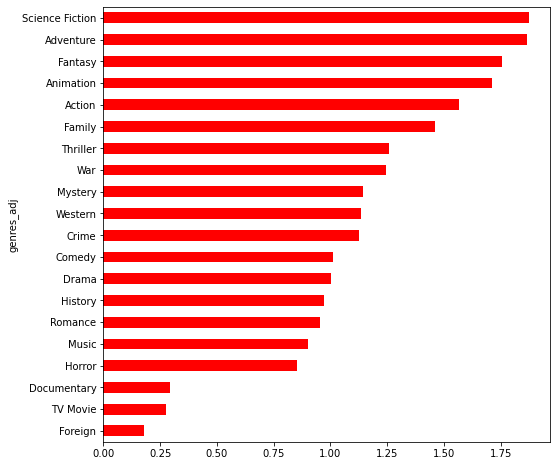

In [24]:
df_merged.groupby(['genres_adj']).popularity.mean().sort_values().plot(kind='barh',color='red',figsize=(8,8));

__It seems that science fiction movies are most popular from year to year__


### Research Question 2  (which genres of movies have the highest and lowest  budget ?!)

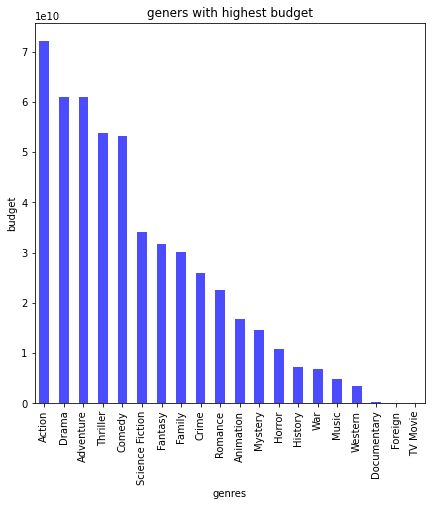

In [69]:
# Continue to explore the data to address your additional research
budget_genres = df_merged.groupby(['genres_adj']).budget_adj.sum().sort_values(ascending=False)
budget_genres.plot(kind='bar',color='b',alpha = .7,figsize=(7,7))
plt.title('geners with highest budget')
plt.xlabel('genres')
plt.ylabel('budget')
plt.show();

__It shows that Action movies takes the highest budget , and on the other side TV movies takes the lowest budget !__

### Research Question 3 (which  movies have the highest and lowest revenue ?!)

In [70]:
# making a function to estimate
def stats(column):
    #for highes value
    high = df_merged[column].idxmax()
    high_data = pd.DataFrame(df_merged.loc[high])
    #for lowest value
    low = df_merged[column].idxmin()
    low_data = pd.DataFrame(df_merged.loc[low])
    
    return(high_data,low_data)


  

In [71]:
#now we call the function
stats('revenue_adj')

(                                                            19995
                                                                 0
 popularity                                               9.432768
 original_title                                             Avatar
 director                                            James Cameron
 overview        In the 22nd century, a paraplegic Marine is di...
 runtime                                                       162
 release_date                                  2009-12-10 00:00:00
 vote_count                                                   8458
 vote_average                                                  7.1
 release_year                                                 2009
 budget_adj                                              240886902
 revenue_adj                                            2827123750
 genres_adj                                                 Action,
                                                             

> __IT seems that avatar it the highest revenue with 2827123750 dollars  
and shattered Glass is the lowest one with 2 dollars__

### Research Question 4 (which movies have the highest and lowest budget ?!)

In [72]:
#using the function
stats('budget_adj')

(                                                            46528
                                                                 0
 popularity                                                0.25054
 original_title                                  The Warrior's Way
 director                                               Sngmoo Lee
 overview        An Asian assassin (Dong-gun Jang) is forced to...
 runtime                                                       100
 release_date                                  2010-12-02 00:00:00
 vote_count                                                     74
 vote_average                                                  6.4
 release_year                                                 2010
 budget_adj                                              425000000
 revenue_adj                                              11087569
 genres_adj                                              Adventure,
                                                             

> __The Warrior's Way had the largest budget of 425000000 dollar  
Lost & Found movie has the lowest budget of 1 dollar__

### Research Question 5 (which movies have the highest and lowest runtime ?!)

In [73]:
#running the function
stats('runtime')

(                                                            43434
                                                                 0
 popularity                                               0.534192
 original_title                                             Carlos
 director                                          Olivier Assayas
 overview        The story of Venezuelan revolutionary, Ilich R...
 runtime                                                       338
 release_date                                  2010-05-19 00:00:00
 vote_count                                                     35
 vote_average                                                  6.2
 release_year                                                 2010
 budget_adj                                               18000000
 revenue_adj                                                871279
 genres_adj                                                  Crime,
                                                             

> __Carlos has the longest runtime with 338 minutes   
and Kid's story has the lowest run time with 15 minutes__

###  Research Question 6 (how revenues changed over the years ?)

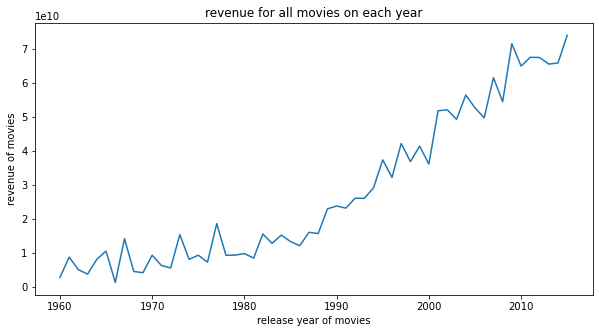

In [74]:
# we will polt the revenue of the movies for each year using line chart
revenue_year = df_merged.groupby('release_year')['revenue_adj'].sum()
plt.figure(figsize=(10,5))
plt.xlabel('release year of movies')
plt.ylabel('revenue of movies')
plt.title('revenue for all movies on each year')
plt.plot(revenue_year);



In [75]:
# showing which year made the highes and lowest revenues
higest_year = revenue_year.idxmax()
lowest_year = revenue_year.idxmin()
higest_year , lowest_year

(2015, 1966)

####  We found that 2015 was the year that collected the most revenues, while 1966 was the least 

>

### finding the  characteristics of high revenue  movies.

*first we calculate the mean revenue to estimate the high revnue movies and its Characteristics*

In [76]:
mean_revenue = df_merged.revenue_adj.mean()
mean_revenue

151744146.80015528

In [77]:
df_high_revenue = df_merged.query('revenue_adj > @mean_revenue ')
df_high_revenue.head()

popularity      original_title         director  \
id                                                          
135397 0   32.985763      Jurassic World  Colin Trevorrow   
       1   32.985763      Jurassic World  Colin Trevorrow   
       2   32.985763      Jurassic World  Colin Trevorrow   
       3   32.985763      Jurassic World  Colin Trevorrow   
76341  0   28.419936  Mad Max: Fury Road    George Miller   

                                                   overview  runtime  \
id                                                                     
135397 0  Twenty-two years after the events of Jurassic ...      124   
       1  Twenty-two years after the events of Jurassic ...      124   
       2  Twenty-two years after the events of Jurassic ...      124   
       3  Twenty-two years after the events of Jurassic ...      124   
76341  0  An apocalyptic story set in the furthest reach...      120   

         release_date  vote_count  vote_average  release_year  budget_adj  \
id                                                                          
135397 0   2015-06-09        5562           6.5          2015   137999939   
       1   2015-06-09        5562           6.5          2015   137999939   
       2   2015-06-09        5562           6.5          2015   137999939   
       3   2015-06-09        5562           6.5          2015   137999939   
76341  0   2015-05-13        6185           7.1          2015   137999939   

          revenue_adj       genres_adj  
id                                      
135397 0   1392445892           Action  
       1   1392445892        Adventure  
       2   1392445892  Science Fiction  
       3   1392445892         Thriller  
76341  0    348161292           Action

 ### The minimum  revenue for high revenue  movies

In [78]:
df_high_revenue.revenue_adj.min()

152263880

__So a high revenue movie should at least makes 152 million dollars__

### The runtime for high revenue movies

In [79]:
df_high_revenue.runtime.mean()

117.18205631958088

__The average  runtime for high revenue movies is 117 minutes__

### Top directors for high revenue movies 

In [80]:
df_high_revenue.groupby('director')['revenue_adj'].sum().sort_values(ascending=False).head()

director
Steven Spielberg    39548420038
James Cameron       24609850607
Robert Zemeckis     20022009665
Peter Jackson       18860483448
George Lucas        18337602972
Name: revenue_adj, dtype: int64

> __Top directors for high revenue movies are: Steven Spielberg ,James Cameron, Robert Zemeckis, Peter Jackson, George Lucas__

### Genres that is associated with high revenue movies

In [81]:
high_genres = df_high_revenue.groupby('genres_adj')['revenue_adj'].sum().head().sort_values(ascending=False)

**plotting**

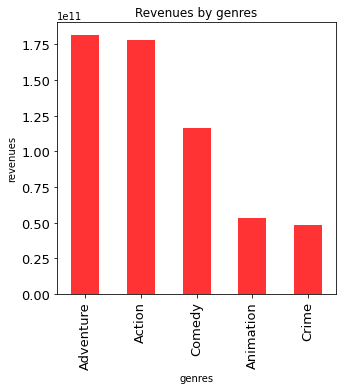

In [66]:
high_genres.plot(kind='bar',title = 'Revenues by genres', color='r', alpha = .8, figsize=(5,5),fontsize=13)
plt.xlabel('genres')
plt.ylabel('revenues')
plt.show()

####  that means that adventure movies makes the highest revenues

>

<a id='conclusions'></a>
## Conclusions

> **High revenue movies characteristics:**  
1- Make at least 152 million dollars to be in that category  
2- Have at least 117 minutes of  runtime  
3- Adventure type is highly recommended to make high revenue  
4- are prefered to be directed by one of those directors :   
Steven Spielberg ,James Cameron, Robert Zemeckis, Peter Jackson, George Lucas